
[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/solomonrajkumar.sathianandaraj/Library/CloudStorage/OneDrive-McKessonCorporation/Documents/Solo_docs/INTO_United_States/Learning_Path/Hope AI /Start Course/Week_2_Python/myevn/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/solomonrajkumar.sathianandaraj/Library/CloudStorage/OneDrive-McKessonCorporation/Documents/Solo_docs/INTO_United_States/Learning_Path/Hope AI /Start Course/Week_2_Python/myevn/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


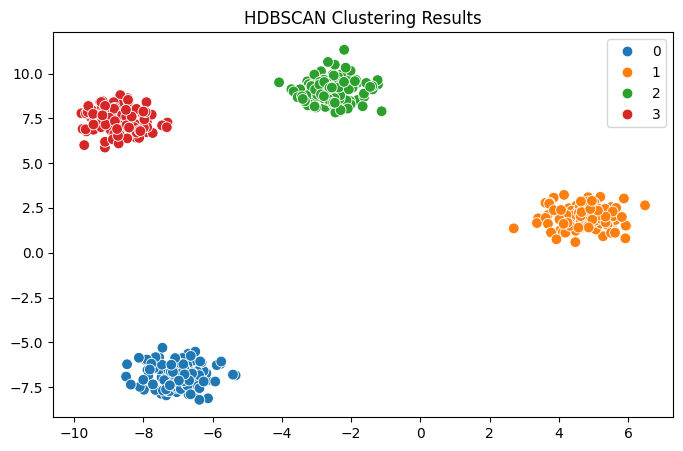

Evaluation Metrics (excluding noise):
 - Silhouette Score: 0.876
 - Calinski-Harabasz Index: 15874.713
 - Davies-Bouldin Index: 0.175


In [3]:
# Install required libraries if you don't have them:
# !pip install hdbscan scikit-learn matplotlib seaborn

%pip install hdbscan

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import hdbscan

# --- 1. Generate sample data ---
X, y_true = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.60, random_state=42)

# --- 2. Run HDBSCAN clustering ---
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
labels = clusterer.fit_predict(X)

# --- 3. Visualize the clusters ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="tab10", s=60)
plt.title("HDBSCAN Clustering Results")
plt.show()

# --- 4. Evaluation metrics ---
# Note: HDBSCAN may assign some points as noise (label = -1), so we filter them out.
mask = labels != -1
X_filtered = X[mask]
labels_filtered = labels[mask]

if len(np.unique(labels_filtered)) > 1:
    silhouette = silhouette_score(X_filtered, labels_filtered)
    calinski = calinski_harabasz_score(X_filtered, labels_filtered)
    davies = davies_bouldin_score(X_filtered, labels_filtered)

    print("Evaluation Metrics (excluding noise):")
    print(f" - Silhouette Score: {silhouette:.3f}")
    print(f" - Calinski-Harabasz Index: {calinski:.3f}")
    print(f" - Davies-Bouldin Index: {davies:.3f}")
else:
    print("Not enough clusters to compute evaluation metrics.")
